### charger digits

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


<Figure size 432x288 with 0 Axes>

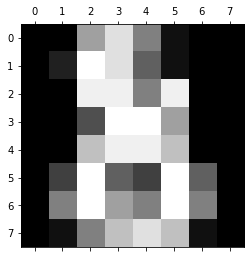

In [25]:
from sklearn import datasets
import matplotlib.pyplot as plt 
digits = datasets.load_digits()

# Create feature matrix
X = digits.data

# Create target vector
y = digits.target

# View the first observation's feature values
print(X[0])
# View the first observation's feature values as a matrix
digits.images[-1]
plt.gray() 
plt.matshow(digits.images[-1]) 
plt.show()

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

### visualiser datset:images of digits

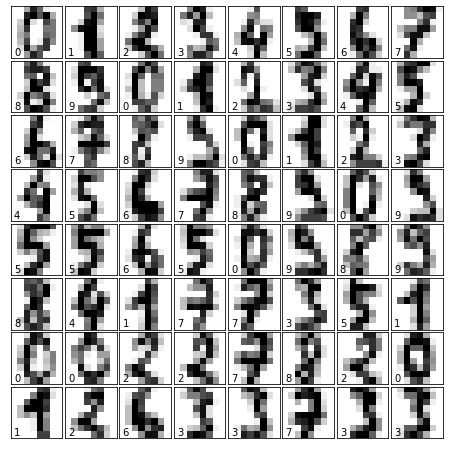

In [3]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

### Classify with Gaussian naive Bayes

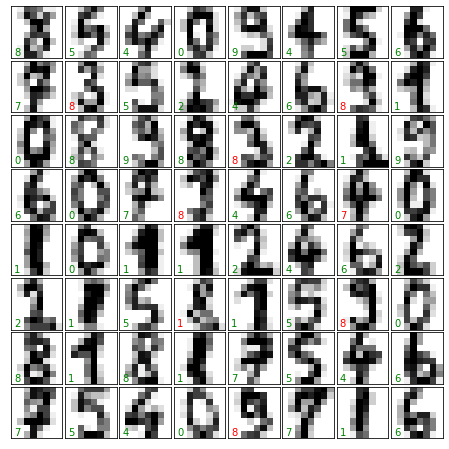

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

# train the model
clf = GaussianNB()
clf.fit(X_train, y_train)

# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
expected = y_test

# Plot the prediction
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap=plt.cm.binary,
              interpolation='nearest')

    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color='green')
    else:    # label the image with the target value

        ax.text(0, 7, str(predicted[i]), color='red')

In [16]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(digits.data[:-1], digits.target[:-1])
clf.predict(digits.data[-1:])
clf.predict(digits.data[-1:])

array([8])

### distance jaccard

In [1]:
import numpy as np

def compute_jaccard(x, y):
    
        #Jaccard Similarity J (A,B) = | Intersection (A,B) | / | Union (A,B) |
   
    intersection= len(set(x).intersection(set(y)))
    union = len(set(x).union(set(y)))
    return intersection / float(union)
test = compute_jaccard(np.array([0, 12, 3, 1, 7,15]), np.array([4, 2, 3, 5, 7, 9]))
print("Jaccard Similarity est : %s" %test)

Jaccard Similarity est : 0.2


### image difference

In [8]:
import cv2
im = cv2.imread('Original.jpg')
im1 = cv2.imread('Edited.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(im1, contours, -1, (0,255,0), 1)
cv2.imwrite("see_this.jpg", im1)

True

In [9]:
import cv2 
Original = cv2.imread("Original.jpg")
Edited = cv2.imread("Edited.jpg")
diff = cv2.subtract(Original, Edited)
cv2.imwrite("diff.jpg", diff)

True

In [1]:
import cv2
from skimage.measure import compare_ssim
import argparse
import imutils
imageA = cv2.imread('origi.jpg')
imageB = cv2.imread ('dupl.jpg')
# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

# loop over the contours
for c in cnts:
	# compute the bounding box of the contour and then draw the
	# bounding box on both input images to represent where the two
	# images differ
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)
# show the output images
cv2.imshow('image1',imageA)
cv2.imshow('image2',imageB)
cv2.imshow('difference',diff)
cv2.imshow('threach',thresh)

SSIM: 0.5547973444059437


In [16]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
#charger digits
digits = datasets.load_digits()
print(len(digits.images))


1797


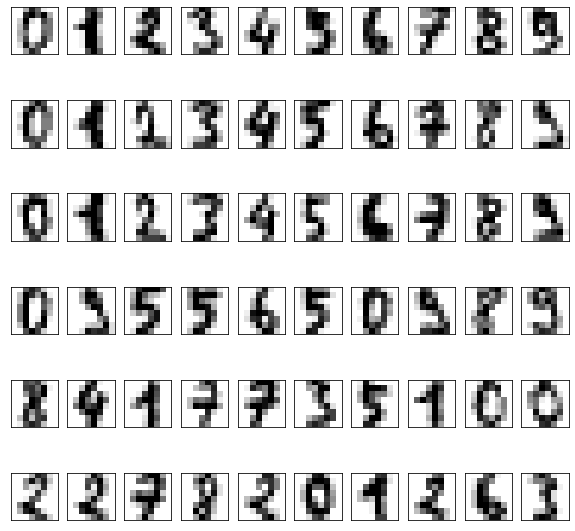

In [24]:
#afficher digits
plt.figure(figsize=(10,10))
for i in range(60):
    plt.subplot(6,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(digits.images[i], cmap=plt.cm.binary)
plt.show()

In [12]:
# algorithme projection calcule projection verticale et horizentale
def Projection(image):
    array = np.array(image)
    horz = np.array([np.count_nonzero(row) for row in array])
    trans = array.transpose()
    ver = np.array([np.count_nonzero(row) for row in trans])

    return horz,ver

In [13]:
# correlation entre les image
def correlation(x,y):
    A = sum((x-np.average(x))*(y-np.average(y)))
    B = np.sqrt(sum(np.power(x-np.average(x),2)))*np.sqrt(sum(np.power(y-np.average(y),2)))
    return A/B

In [56]:
#un dictionnaire pour l'image et leur description
image_desc = { 'image':[],'desc':[]}

#list vide our append image et leur description
images_description = []

for image in digits.images:
    #donner a chaque image une description
    image_desc['image'] = image

    #calculation de projection de chaque image
    horz,ver= Projection(image)
    image_desc['desc'] = ver    
    images_description.append(image_desc)

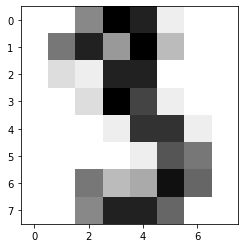

In [57]:
#ajouter image requette
query = digits.images[3]
plt.imshow(query,cmap ='binary')
 # calcul projection de l'image requette
_,ver = Projection(query)

for image_desc in images_description:
    image_desc['distance'] = correlation(ver,image_desc['desc'])

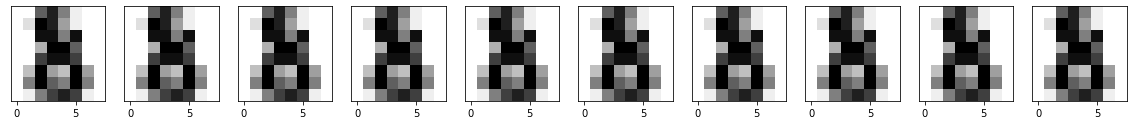

In [58]:
plt.figure(figsize=(20,20))
for i in range(10):

    image_desc = images_description[i]
    plt.subplot(5,10,i+1)
    plt.yticks([])
    #plt.grid(False)
    plt.imshow(image_desc['image'], cmap=plt.cm.binary)
plt.show()